In [1]:
#!/usr/bin/env python3
# coding: utf-8
#from pylab import *
import matplotlib.pyplot as plt
import jieba
with open('weibo_train_data.txt','r') as f:
    all_message=f.readlines()
    f.close()
member={} #每个用户的发帖信息，按照ID分类，无重复
user_id=[] #所有用户的ID，有重复
for i in all_message:
    j=i.split('\t')
    user_id.append(j[0])
    if member.setdefault(j[0]) is None:
        member[j[0]]=[{'post_time':j[2],\
                       'f_count':j[3],\
                      'c_count':j[4],\
                      'l_count':j[5],\
                      'content':j[6]}]
    else:
        member[j[0]].append({'post_time':j[2],\
                       'f_count':j[3],\
                      'c_count':j[4],\
                      'l_count':j[5],\
                      'content':j[6]})

print("微博数目：",len(user_id))
print("博主数目：",len(set(list(member.keys()))))

微博数目： 1229618
博主数目： 37263


Text(0, 0.5, 'Post Count')

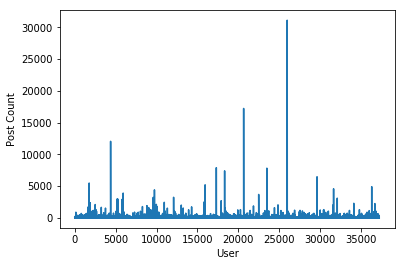

In [2]:
#%matplotlib inline

user_postnum={} #每个用户发帖数，key is ID, value is number

for i in user_id:
    if(user_postnum.setdefault(i) is None):
        user_postnum[i]=1
    else:
        user_postnum[i]+=1


plt.figure()
plt.plot(list(range(len(user_postnum))),list(user_postnum.values()))
plt.xlabel('User')
plt.ylabel('Post Count')


In [3]:
max_user=''
for i in user_postnum.keys():
    if user_postnum[i]>20000:
        print(i)
        max_user=i


875a4a77b339d93f819e2c4de5bd0b57


In [4]:
user_f_count={}
user_c_count={}
user_l_count={}
for i in list(user_postnum.keys()):
    user_f_count[i]=0
    user_c_count[i]=0
    user_l_count[i]=0
for user in list(user_postnum.keys()):
    for info in member[user]:
        user_f_count[user]+=int(info['f_count'])
        user_c_count[user]+=int(info['c_count'])
        user_l_count[user]+=int(info['l_count'])

Text(0, 0.5, 'Like Count')

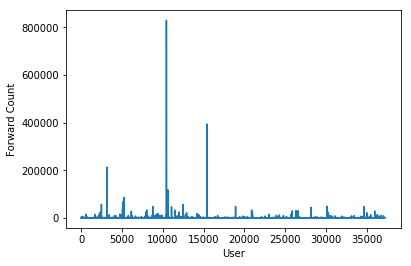

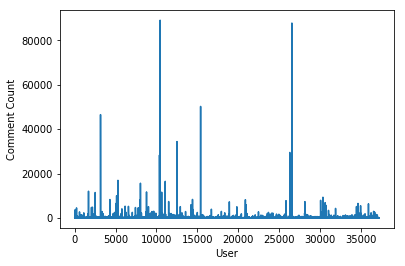

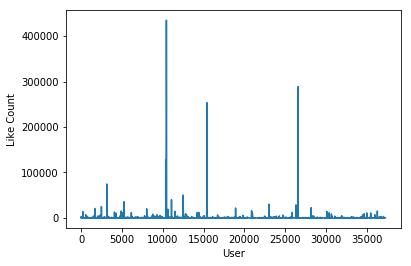

In [5]:
plt.figure()
plt.plot(list(range(len(user_f_count))),list(user_f_count.values()))
plt.xlabel('User')
plt.ylabel('Forward Count')
plt.figure()
plt.plot(list(range(len(user_c_count))),list(user_c_count.values()))
plt.xlabel('User')
plt.ylabel('Comment Count')
plt.figure()
plt.plot(list(range(len(user_l_count))),list(user_l_count.values()))
plt.xlabel('User')
plt.ylabel('Like Count')

In [6]:
def find_max_user(n_dict):
    top = max(n_dict.values())
    for i in n_dict.keys():
        if n_dict[i] == top:
            return {i:n_dict[i]}
        

In [7]:
max_post=find_max_user(user_postnum)
max_f=find_max_user(user_f_count)
max_c=find_max_user(user_c_count)
max_l=find_max_user(user_l_count)
print(max_post,max_f,max_c,max_l)

{'875a4a77b339d93f819e2c4de5bd0b57': 31116} {'e88330514585dc40b7cb8f48c0e0ea2a': 829080} {'e88330514585dc40b7cb8f48c0e0ea2a': 89051} {'e88330514585dc40b7cb8f48c0e0ea2a': 434790}


In [8]:
'''
doc=[]
for i in range(50):
    doc.append(member['e88330514585dc40b7cb8f48c0e0ea2a'][i]['content'])
for i in doc:
    print(' '.join(jieba.cut(i)))
'''

"\ndoc=[]\nfor i in range(50):\n    doc.append(member['e88330514585dc40b7cb8f48c0e0ea2a'][i]['content'])\nfor i in doc:\n    print(' '.join(jieba.cut(i)))\n"

In [50]:
import re
bracket_reg_en=re.compile(r'\((.+?)\)')
bracket_reg_ch=re.compile(r'（(.+?)）')
bracket_reg_ench=re.compile(r'\((.+?)）')
bracket_reg_chen=re.compile(r'（(.+?)\)')

link_reg_space=re.compile(r'http(.+?) ')
link_reg_enter=re.compile(r'http(.+?)\n')
def rem(str_list,text):
    for i in str_list:
        text=text.replace(i,'')
    return text

def pre(doc):
    doc_pre=[] #doc is list
    for i in doc:
        res_en=bracket_reg_en.findall(i)
        res_ch=bracket_reg_ch.findall(i)
        res_ench=bracket_reg_ench.findall(i)
        res_chen=bracket_reg_chen.findall(i)
        res_link_space=link_reg_space.findall(i)
        res_link_enter=link_reg_enter.findall(i)
        for j in range(len(res_link_space)):
            res_link_space[j]='http'+res_link_space[j]+' '
        for j in range(len(res_link_enter)):
            res_link_enter[j]='http'+res_link_enter[j]
        #print(res_en,res_ch,res_ench,res_chen,res_link)
        i=rem(res_en,i)
        i=rem(res_ch,i)
        i=rem(res_ench,i)
        i=rem(res_chen,i)
        i=rem(res_link_space,i)
        i=rem(res_link_enter,i)  
        i=rem(['(',')','（','）',',','.','，','。','!','！'],i)
        
        #print(i)
        doc_pre.append(i)
    return doc_pre
#doc_pre=pre(doc) 
#for i in doc_pre:
    #print(' '.join(jieba.cut(i)))

In [10]:
data_f={1:[],2:[]}
for i in all_message:
    i=i.split('\t')
    if i[3]=='1':
        data_f[1].append(i[6])
    elif i[3]=='2':
        data_f[2].append(i[6])

In [11]:
data_f[1]=pre(data_f[1])
#data_f[2]=pre(data_f[2])
text=data_f[1]
with open('text.txt','w') as f:
    with open('textSeg.txt','wb') as g:
        for i in range(len(text)):
            f.write(text[i])
            g.write(' '.join(jieba.cut(text[i])).encode('utf-8'))
#textSeg=[]
#with open('textSeg.txt','wb') as f:
#    for i in range(len(text)):
#        f.write(' '.join(jieba.cut(text[i])).encode('utf-8'))
    

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 2.178 seconds.
Prefix dict has been built succesfully.


In [12]:
import word2vec
word2vec.word2vec('textSeg.txt','textSeg.bin',size=300,verbose=True)

Starting training using file textSeg.txt
Vocab size: 31615
Words in train file: 2830057
Alpha: 0.000033  Progress: 99.97%  Words/thread/sec: 95.80k   83.16k  273  Progress: 2.98%  Words/thread/sec: 84.93k  ords/thread/sec: 91.35k  ess: 28.65%  Words/thread/sec: 95.21k  ss: 41.35%  Words/thread/sec: 95.10k  pha: 0.013687  Progress: 45.32%  Words/thread/sec: 95.06k  

In [13]:
model=word2vec.load('textSeg.bin')

In [45]:
from sklearn.decomposition import PCA
raw_word_vec=model.vectors
X=PCA(2).fit_transform(raw_word_vec)
print(model.vocab[:50])
indexs=model.similar('在')
print(indexs)

['</s>' '，' '的' '。' '了' '#' '是' '、' '在' '：' '我' '【' '】' '[' ']' '@' '和'
 '！' '-' '你' '.' '/' '？' '“' '”' '有' '都' '一个' '就' '不' '也' '…' '人' ',' ':'
 '；' '中' '—' '数据' '》' '《' '与' '上' '到' '将' '我们' '可以' '为' '大' '这']
(array([  260, 28665,  1344,  1770,  2701,   182,  6193,  2779,  1863,
          92]), array([0.46188631, 0.45998657, 0.43382885, 0.43287978, 0.42894045,
       0.42811158, 0.42154066, 0.41685994, 0.41307902, 0.41191494]))


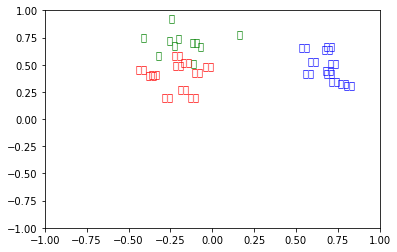

In [48]:
import numpy as np
index1,met1=model.similar(model.vocab[30])
index2,met2=model.similar(model.vocab[400])
index3,met3=model.similar(model.vocab[1200])
index1=np.append(index1,[30])
index2=np.append(index2,[400])
index3=np.append(index3,[1200])
plt.figure()
for i in index1:
    plt.text(X[i][0],X[i][1],model.vocab[30],color='g')
for i in index2:
    plt.text(X[i][0],X[i][1],model.vocab[400],color='r')
for i in index3:
    plt.text(X[i][0],X[i][1],model.vocab[1200],color='b')

plt.axis([-1,1,-1,1])
plt.show()

In [49]:
import nltk

ImportError: No module named 'nltk'